<a href="https://colab.research.google.com/github/JM-glich/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CHECKPOIN 1***

# **BUSINESS UNDERSTANDING**

## **Business Objective**

Objektif dari projek ini adalah untuk mencari pola dan memprediksi penyakit stroke berdasarkan faktor dan informasi kesehatan pasien guna membantu dokter dalam pengambilan keputusan medis yang tepat. Selain itu ini akan membantu dokter dalam memprioritaskan pasien dan efisiensi dalam perawatan.

## **Assess situation**

Kondisi di mana meningkatnya jumlah pasien dengan faktor dan risiko terkena stroke sementara terbatasnya tenaga medis dalan melakukan diagnosis dini menjadi tantangan utama yang harus diatasi. Selain itu kurangnya kesadaran akan gaya hidup tidak sehat seperti merokok, obesitas, kurang aktifitas fisik juga menjadi hal yang perlu diperhatikan. Dengan adanya analisis yang dilakukan diharapkan dapat mengatasi masalah ini.

## **Data Mining Goals**

Menemukan pola dalam faktor risiko dengan mengidentifikasi hubungan variable-variable medis dan kejadian stroke. Lalu, mengelompokkan pasien berdasarkan risiko stroke dan menganalisis efisiensi perawatannya.

## **Project Plan**

Tahapan atau rencana pengerjaannya:
1. Pengumpulan Data. Mengumpulkan dataset yang berisi resiko atau prediksi stroke. Variable yang dikumpulan seperti Usia, diabetes, BMI, riwayat merokok, aktifitas fisik, dan lain-lain yang sekiranya dibutuhkan. Lalu mencari informasi mengenai faktor risiko stroke.

2. Mempersiapkan dan Membersihkan Data. Tujuannya untuk mempersiapkan data untuk dianalisis.
Langkah-langkahnya bisa berupa:
- Mengatasi missing values atau data kosong.
- Menghapus atau menangani Outlier.
- Jika diperlukan, melakukan semacam standarisasi data.
- Mengubah data kategorial menjadi data numerik untuk memudahkan analisis jika diperlukan.

3. Exploratory Data Analysis (EDA). Pada dasarnya menganalisis data yang bertujuan untuk memahami distrubusi data, pola-polanya, dan korelasi antara variablenya. Hal ini meliputi Visualisasi data (Misal dengan Histogram, diagram, heatmap korelasi), Analisis stastistik, dan mengidenfikasi variable yang paling berpengaruh terhadap risiko stroke.

4. Evaluasi. Menentukan model yang efisien dan efektif dalam kinerjanya. Lalu, mencoba model pada data real-world dan memantau performa model. Serta melakukan evaluasi tahapan plan dan menjadikan bahan informasi untuk kedepannya.

***CHECKPOIN 2***

## **Membaca Data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data (1).csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## **Memeriksa Tipe Data, jumlah baris, dan kolom**

In [3]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [4]:
df.shape

(5110, 12)

## **Statistik Deskriptif**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.corr(numeric_only=True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


# **DATA PREPARATION**

## **Data Cleaning**

### **Mencari missing value**

In [8]:
(df.isnull().sum() / len(df)) *100

,0
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,3.933464


Karena nilai bmi terdapat missing value, ada dua pilihan yang bisa dilakukan. Antara menghapusnya atau melakukan imputasi. Karena nilai missing value-nya jauh dari 70% maka saya memilih melakukan imputasi.

Mengecek distribusiinya

In [9]:
df['bmi'].describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


Melakukan imputasi dengan median.

In [10]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

### **Mengecek Duplicate value**

In [11]:
df[df.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Karena tidak ada duplicate value maka tidak perlu ada tindakan lebih lanjut.

### **Mengecek kolom yang memiliki outlier**

In [12]:
numerical_columns = df.select_dtypes(include=['number']).columns

outlier_columns = []

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        outlier_columns.append(col)

print("Kolom yang memiliki outliers:", outlier_columns)

Kolom yang memiliki outliers: ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


### **Incosistent Value**

In [13]:
df.head(51)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [14]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Mencari nilai unik

In [15]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Kolom: {col}")
    print(df[col].unique(), "\n")

Kolom: gender
['Male' 'Female' 'Other'] 

Kolom: ever_married
['Yes' 'No'] 

Kolom: work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] 

Kolom: Residence_type
['Urban' 'Rural'] 

Kolom: smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown'] 



Mengecek inkonsistensi angka (semisal nilai bmi)

In [16]:
df['bmi_type'] = df['bmi'].apply(lambda x: 'int' if x == int(x) else 'float')
print(df['bmi_type'].value_counts())

bmi_type
float    4623
int       487
Name: count, dtype: int64


In [17]:
print(df[df['bmi_type'] == 'int']['bmi'].value_counts())

bmi
27.0    35
24.0    28
28.0    28
25.0    27
23.0    27
30.0    27
29.0    26
26.0    25
31.0    22
32.0    21
34.0    17
20.0    17
21.0    17
18.0    16
33.0    15
22.0    15
38.0    13
35.0    12
36.0    11
37.0    10
17.0    10
16.0     8
43.0     8
39.0     7
19.0     7
40.0     6
45.0     5
46.0     4
44.0     4
41.0     3
42.0     3
55.0     2
15.0     2
48.0     1
92.0     1
13.0     1
51.0     1
54.0     1
56.0     1
78.0     1
12.0     1
14.0     1
Name: count, dtype: int64


Karena angka integer nya gak terlalu banyak, aku mencurigai bahwa ini adalah angka dari hasil imputasi kolom bmi sebelumnya.

Mengecek nilai integer sebelum imputasi dan sesudah.

In [18]:
print(df['bmi'].isna().sum())  #Untuk cek jumlah missing value sebelum diimputasi
print(df[df['bmi_type'] == 'int'].shape[0])  #Untuk Cek jumlah nilai missing value integer sekarang


0
487


Nah kan, kayaknya ini emang nilai dari imputasi sebelumnya. Supaya lebih konsisten, tipe datanya diubah semuanya ke tipe float.

In [19]:
print(df['bmi'].apply(type).value_counts())

bmi
<class 'float'>    5110
Name: count, dtype: int64


### **Melakukan Construct Data**

Menambahkan kolom baru. Semisalnya skor resiko hipertensi dan sakit jantung.

In [20]:
df['risk_score'] = df['hypertension'] + df['heart_disease']

In [21]:
print(df[['hypertension', 'heart_disease', 'risk_score']].head(10))

   hypertension  heart_disease  risk_score
0             0              1           1
1             0              0           0
2             0              1           1
3             0              0           0
4             1              0           1
5             0              0           0
6             1              1           2
7             0              0           0
8             0              0           0
9             0              0           0


In [22]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_type,risk_score
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,float,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,float,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,float,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,float,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,int,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,float,1
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,int,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,float,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,float,0


### **Data Reduction**

Menghapus kolom yang tidak relevan dengan studi kasus yang diambil. Dalam studi kasus kali ini yakni bertema "*Stroke Prediction*" maka kolom id tidak akan berpengaruh pada hasil analisis ke tema ini.

Menghapus kolom id

In [23]:
df.drop(columns=['id'], inplace=True)

In [24]:
print(df.columns)

df

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_type', 'risk_score'],
      dtype='object')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_type,risk_score
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,float,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,float,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,float,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,float,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,int,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,float,1
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,int,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,float,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,float,0


# **VISUALISASI DAN ANALISIS**

### Mengimport Library

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_type,risk_score
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,float,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,float,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,float,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,float,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,int,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,float,1
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,int,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,float,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,float,0


### Melihat Distribusi Usia dan Stroke dengan Histogram

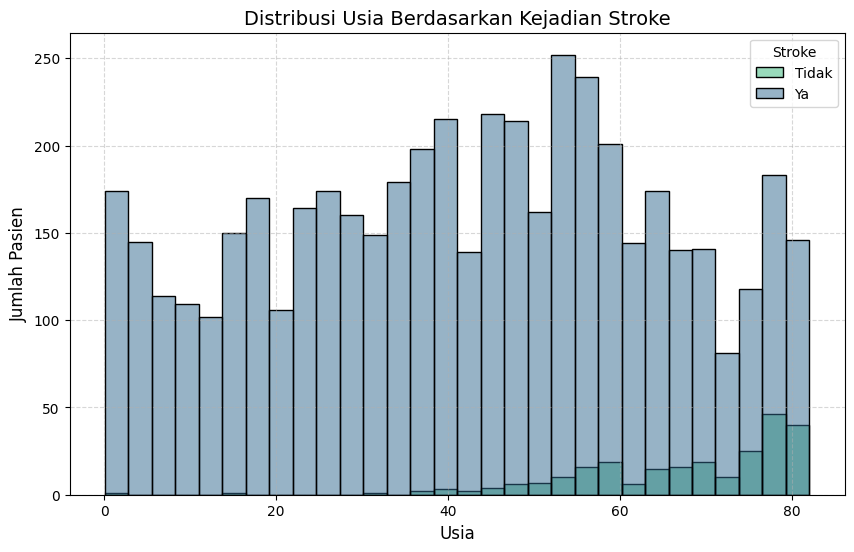

In [27]:
plt.figure(figsize=(10, 6))

# Membuat histogram dengan seaborn
sns.histplot(data=df, x="age", hue="stroke", bins=30, palette="viridis", alpha=0.5)

# Menambahkan judul dan label
plt.title("Distribusi Usia Berdasarkan Kejadian Stroke", fontsize=14)
plt.xlabel("Usia", fontsize=12)
plt.ylabel("Jumlah Pasien", fontsize=12)
plt.legend(title="Stroke", labels=["Tidak", "Ya"])
plt.grid(True, linestyle="--", alpha=0.5)

INSIGHT.

Pasien dalam dataset ini tersebar dalam berbagai rentang usia, mulai dari anak-anak hingga lansia. Dari visualisasi ini ada beberapa hal yang didapat seperti:

Distribusi Usia pasien.
* Kelompok di usia 40-60 tahun terlihat memiliki jumlah pasien yang cukup tinggi, tetapi jumlah terbesar ada di usia sekitar 50-an dan 70-an.

Pola Kejadian Stroke.
* Terlihat bahwa kejadian stroke lebih sering terjadi pada pasien yang lebih tua (Bisa dilihat dari bar "Ya" yang mulai muncul lebih signifikan di usia 40+ dan lebih banyak lagi di usia 60-80 tahun).
* Kejadian stroke cukup jarang atau sangat sedikit terjadi di rentang usia muda (<30 tahun), yang menunjukan bahwa usia merupakan faktor resiko utama.

Perbandingan dengan Populasi Umum.
* Meskipun pasien usia muda lebih banyak dibandingkan dengan lansia dalam dataset, hampir semua kejadian stroke terjadi di usia di atas 50 tahun.
* Ini sejalan dengan fakta medis bahwa faktor usia meningkatkan risiko stroke karena faktor degeneratif seperti hipertensi, kolesterol tinggi, dan penyakit jantung yang lebih umum pada lansia.

KESIMPULAN.
* Risiko stroke meningkat signifikan setelah usia 50 tahun dan sangat tinggi setelah 60 tahun.
* Hampir tidak ada kasus stroke pada kelompok usia muda.

TINDAKAN.
* Pencegahan sejak dini dengan gaya hidup sehat, terutama bagi mereka yang mendekati usia 50 tahun agar bisa lebih terhidar dari resiko terkena stroke.
* Edukasi kesehatan kepada kelompok usia lanjut mengenai pentingnya mengontrol tekanan darah, pola makan, dan olahraga untuk mencegah stroke.
* Peningkatan skrining medis untuk deteksi dini pada individu berusia 50 tahun ke atas.

### Menganalisis hubungan status merokok dengan kejadian Stroke dengan Bar Chart

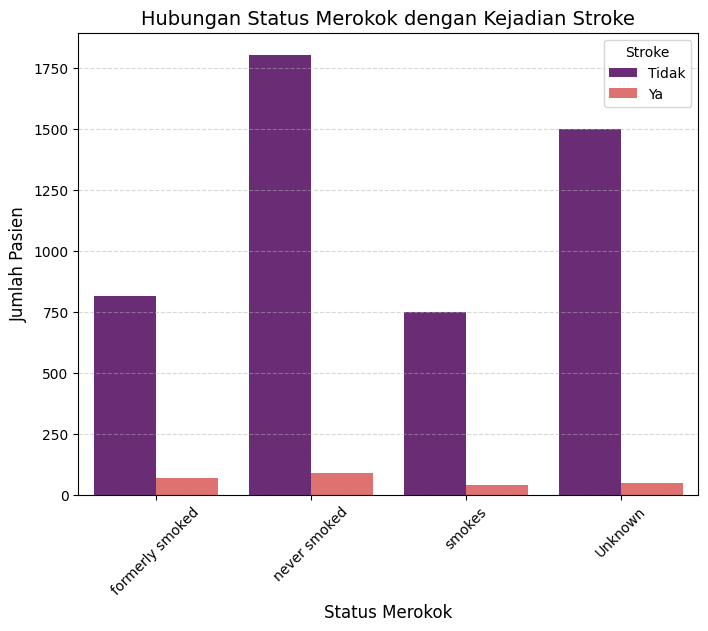

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="smoking_status", hue="stroke", palette="magma")

# Menambahkan judul dan label
plt.title("Hubungan Status Merokok dengan Kejadian Stroke", fontsize=14)
plt.xlabel("Status Merokok", fontsize=12)
plt.ylabel("Jumlah Pasien", fontsize=12)
plt.legend(title="Stroke", labels=["Tidak", "Ya"])
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

INSIGHT.

Mayoritas pasien adalah non-perokok.
* Kategori never smoked memiliki jumlah pasien tertinggi dibandingkan kategori lainnya.
* Namun, meskipun jumlahnya tinggi, pasien yang mengalami stroke dalam kategori ini tetap relatif kecil dibanding yang tidak mengalami stroke (Hal ini bisa dilihat dari perbandingan antara label stroke "Ya" dengan "Tidak" yang signifikan).

Mantan perokok (formerly smoked) memiliki proporsi stroke yang cukup signifikan.
* Dari semua kategori, formerly smoked terlihat memiliki proporsi stroke yang lebih tinggi dibandingkan perokok aktif.
* Ini bisa menunjukkan bahwa dampak merokok mungkin masih bertahan meskipun seseorang sudah berhenti merokok.

Perokok aktif (smokes) memiliki jumlah stroke yang lebih kecil dibandingkan mantan perokok.
* Hal ini bisa jadi karena jumlah perokok aktif dalam dataset lebih sedikit.
* Tapi ini juga bisa jadi bahwa efek merokok terhadap stroke lebih terasa setelah seseorang berhenti dan faktor lain ikut berperan (seperti usia dan riwayat kesehatan).

Kategori unknown.

* Jumlah pasien dalam kategori ini cukup tinggi, dan ada yang mengalami stroke.
* Karena status merokoknya tidak diketahui, maka tidak dapat secara langsung diambil kesimpulan.

KESIMPULAN.
* Mantan perokok terlihat lebih berisiko terkena stroke dibandingkan perokok aktif dalam dataset ini.
* Perokok aktif tetap memiliki risiko stroke, tapi jumlahnya lebih kecil (kemungkinan karena jumlah data lebih sedikit atau efek akumulatif merokok baru terasa setelah berhenti).
* Non-perokok tetap bisa mengalami stroke, tapi dalam jumlah yang jauh lebih kecil secara proporsi.

TINDAKAN.
* Edukasi & Kampanye Pencegahan dengan melakukan sosialisasi bahaya merokok terhadap risiko stroke.
* Dukungan Kesehatan untuk Perokok & Mantan Perokok melalui dukungan berhenti merokok dengan terapi nikotin atau konseling psikologis.
* Pemeriksaan rutin tekanan darah dan kolesterol bagi kelompok berisiko tinggi.

### Pengaruh BMI terhadap Stroke

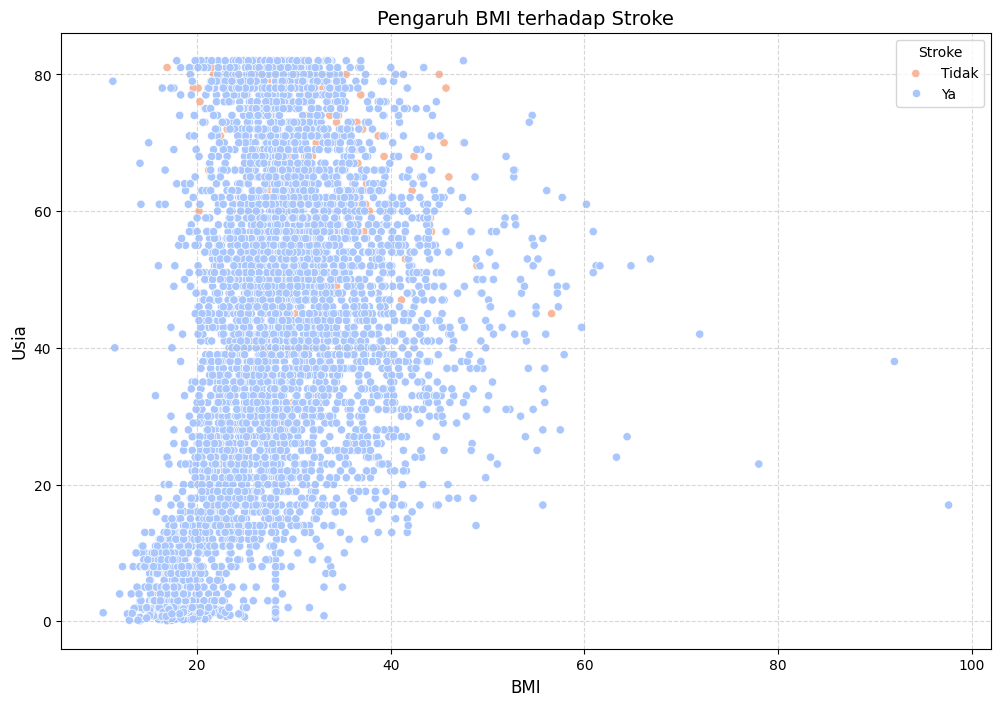

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="bmi", y="age", hue="stroke", palette="coolwarm", alpha=1)

plt.title("Pengaruh BMI terhadap Stroke", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Usia", fontsize=12)
plt.legend(title="Stroke", labels=["Tidak", "Ya"])

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

INSIGHT.

Data memiliki sebaran yang luas. Dari visualisasi ini didapat bahwa:
* Data menunjukkan berbagai nilai BMI dari rendah hingga tinggi, dengan sebagian besar individu memiliki BMI antara 20 hingga 40.
* Beberapa individu dengan BMI tinggi (>30) mengalami stroke, tetapi banyak juga yang tidak. Ini berarti BMI sendiri bukan satu-satunya faktor risiko utama stroke.
* Ada juga beberapa kasus stroke pada individu dengan BMI di bawah 25, Ini berarti faktor lain seperti tekanan darah, usia, atau lainnya mungkin berpengaruh.

KESIMPULAN.

* Usia memiliki peran yang lebih signifikan dibanding BMI dalam risiko stroke. Hal ini bisa terlihat dari visualisasi di atas yang menunjukan bahwa emakin tua seseorang, semakin tinggi kemungkinan terkena stroke, terlepas dari BMI-nya.
* BMI bukan satu-satunya indikator stroke. Dilihat dari hasil analisis dataset, meskipun obesitas bisa meningkatkan risiko, tetapi faktor lain seperti hipertensi, diabetes, dan gaya hidup kemungkinan lebih berpengaruh.

TINDAKAN.

Karena individu dengan BMI normal pun bisa terkena stroke, maka perlu ditekankan pentingnya diet sehat, olahraga, dan kontrol tekanan darah untuk semua kategori berat badan.

### Hubungan Stroke dengan Hipertensi dan Penyakit Jantung

<Figure size 800x600 with 0 Axes>

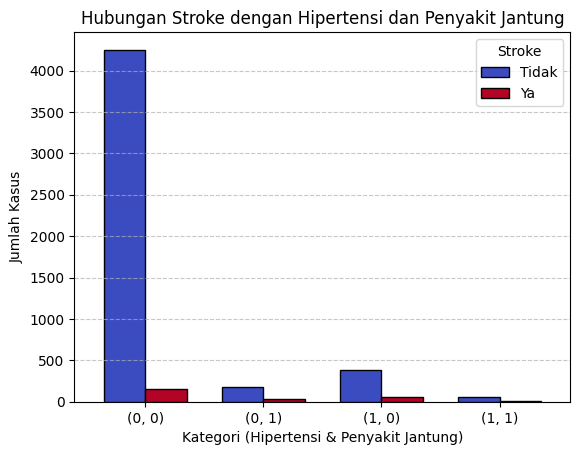

In [35]:
plt.figure(figsize=(8, 6))
stroke_counts.plot(kind='bar', colormap='coolwarm', edgecolor='black', width=0.7)

plt.title('Hubungan Stroke dengan Hipertensi dan Penyakit Jantung')
plt.xlabel('Kategori (Hipertensi & Penyakit Jantung)')
plt.ylabel('Jumlah Kasus')
plt.legend(title='Stroke', labels=['Tidak', 'Ya'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

INSIGHT

* Mayoritas pasien berada di kategori (0,0) → tidak memiliki hipertensi maupun penyakit jantung. Dari jumlah ini, hanya sebagian kecil yang mengalami stroke.
* Kategori hipertensi (1,0) memiliki jumlah stroke lebih tinggi dibandingkan kategori (0,0) jika dilihat berdasarkan perbandingan rasio pasien dengan jumlah terkena stroke. Ini menunjukkan bahwa hipertensi meningkatkan risiko stroke.
* Kategori penyakit jantung (0,1) juga memiliki lebih banyak pasien stroke dibanding (0,0), meskipun jumlahnya lebih kecil dibanding kategori hipertensi. Artinya, penyakit jantung juga berkontribusi terhadap risiko stroke, meskipun tidak sebesar hipertensi.
* Kategori (1,1) memiliki proporsi stroke yang lebih tinggi dibanding kategori lainnya. Artinya, pasien dengan hipertensi dan penyakit jantung sekaligus lebih rentan mengalami stroke.
* Meskipun jumlah total pasien di kategori (1,1) lebih sedikit, proporsi yang terkena stroke cukup tinggi. Ini bisa mengindikasikan bahwa kombinasi hipertensi dan penyakit jantung meningkatkan risiko stroke secara signifikan.

KESIMPULAN.

* Hipertensi dan penyakit jantung keduanya meningkatkan risiko stroke, tetapi hipertensi tampaknya memiliki pengaruh yang lebih besar.
* Kombinasi hipertensi dan penyakit jantung menyebabkan risiko stroke yang jauh lebih tinggi.
* Pasien tanpa hipertensi dan penyakit jantung juga bisa mengalami stroke, tapi dalam jumlah yang lebih kecil secara proporsi.

TINDAKAN.

* Anjuran pola makan sehat, olahraga rutin, dan menghindari faktor risiko seperti merokok & konsumsi garam berlebih untuk menekan risiko hipertensi & penyakit jantung.
* Penderita hipertensi dan/atau penyakit jantung harus mendapatkan pengobatan yang tepat untuk mengurangi kemungkinan terkena stroke di kemudian hari.

### Mencari korelasi dengan Heatmap

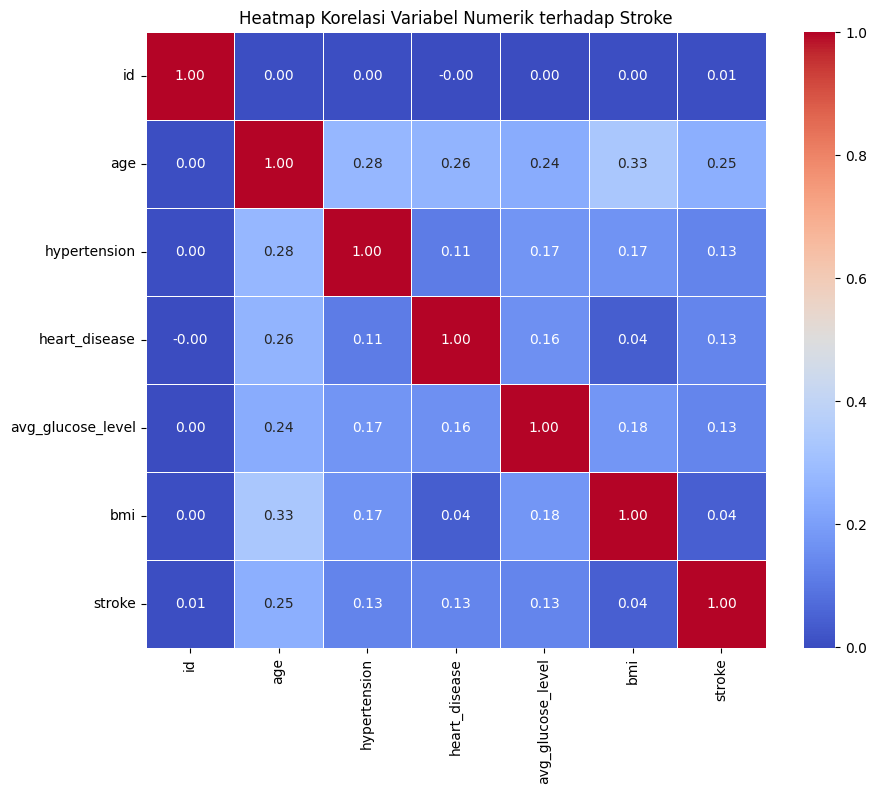

In [44]:
df_numeric = df.select_dtypes(include=['number'])  # Hanya mengambil kolom numerik

correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Variabel Numerik terhadap Stroke")
plt.show()

INSIGHT

Faktor yang paling berpengaruh terhadap stroke:
* Age (usia) = 0.25 Ini artinya semakin tua seseorang, semakin besar risiko terkena stroke.
* Hypertension (hipertensi) = 0.13 Menunjukan hipertensi memiliki hubungan dengan stroke, tetapi tidak setinggi usia.
* Heart Disease (penyakit jantung) = 0.13 Faktor lainnya yang berpengaruh, tapi sama dengan hipertensi, keduanya masih lebih rendah dari usia.
* Average Glucose Level = 0.13 Kadar gula darah seperinya juga memiliki hubungan dengan stroke.
* BMI = 0.04 Korelasinya sangat lemah, hal ini menunjukkan BMI tidak terlalu berpengaruh langsung terhadap stroke.

KESIMPULAN.
* Usia adalah faktor paling berpengaruh → Semakin tua, semakin tinggi kemungkinan stroke.
* Hipertensi, penyakit jantung, dan kadar gula darah memiliki dampak terhadap stroke, meskipun tidak sebesar usia.
* BMI ternyata tidak terlalu berkorelasi dengan stroke, jadi berat badan saja bukan indikator utama risiko stroke.

TINDAKAN.
* Fokus pada deteksi dini stroke untuk lansia karena usia adalah faktor dominan, program kesehatan harus menargetkan kelompok usia yang lebih tua.
* Orang dengan hipertensi dan penyakit jantung perlu lebih waspada terhadap risiko stroke. Karena itu melakukan pemantauan tekanan darah dan kesehatan jantung secara rutin bisa dilakukan.
* Tidak perlu fokus pada BMI sebagai indikator stroke, sebab faktor lain lebih berpengaruh dibanding berat badan seseorang.